# **MOVIE RATING PREDICTION WITH PYTHON**

this dataset contains information about Indian movies, including columns for:**

Name: Movie title Year: Release year Duration: Movie length Genre: Movie genre(s) Rating: IMDb rating Votes: Number of votes  Director: Director's name Actor 1, Actor 2, Actor 3: Main actors There are some missing values, especially in the Duration, Rating, and Votes columns. I'll create relevant graphs and plots to visualize trends in the data, such as:**

Yearly Movie Production – Number of movies released per year Top 10 Movie Genres – Most common genres Distribution of IMDb Ratings – How ratings are spread across movies Movie Duration Distribution – Understanding runtime trends Most Popular Directors – Directors with the most movies**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import zipfile

# ***loading the data***

In [ ]:


# Load the dataset
csv_path = '/content/IMDb Movies India.csv'
df = pd.read_csv(csv_path, encoding='latin1')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='rating', data=df)
plt.title('Movie Ratings by Genre')
plt.xticks(rotation=90)
plt.show()

# Data preprocessing
df = df[['genre', 'director', 'actors', 'rating']]  # Select relevant columns
df.dropna(inplace=True)  # Drop missing values

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df['director'] = le.fit_transform(df['director'])
df['actors'] = le.fit_transform(df['actors'])

# Features and target
X = df.drop(columns=['rating'])
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature importance
feature_importances = pd.DataFrame({'Feature': ['genre', 'director', 'actors'], 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

KeyError: 'rating'

<Figure size 1000x600 with 0 Axes>

# *Clean Year column*

In [ ]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0  109 min            Drama   
2                         #Homecoming  2021.0   90 min   Drama, Musical   
3                             #Yaaram  2019.0  110 min  Comedy, Romance   
4                   ...And Once Again  2010.0  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

In [ ]:
# Basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.2+ MB
None

Missing values:
Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Summary statistics:
          Name          Year Duration  Genre       Rating Votes      Director  \
count    15509  14981.000000     7240  136

#  1: Yearly Movie Production

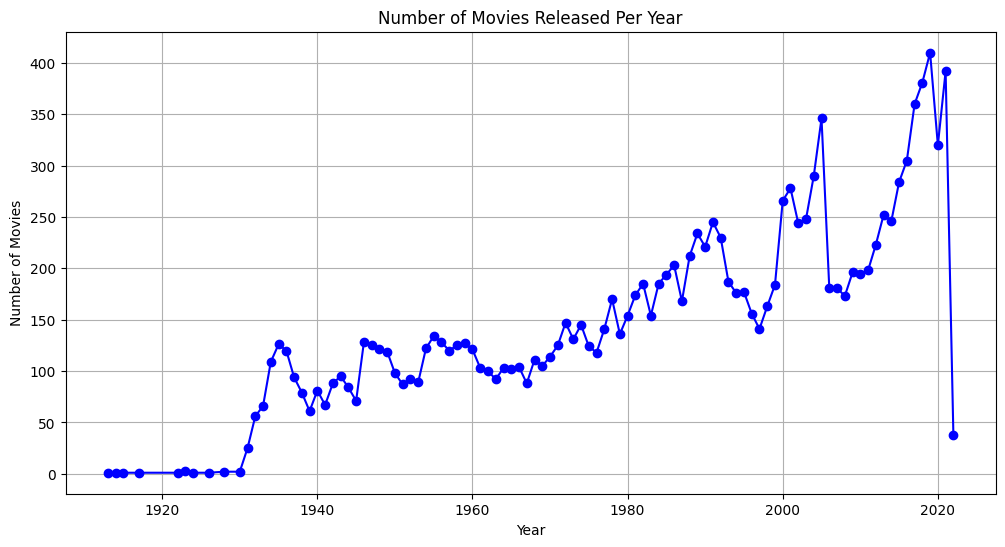

In [ ]:
plt.figure(figsize=(12, 6))
df['Year'].value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.title("Number of Movies Released Per Year")
plt.grid()
plt.show()



This graph shows how many movies were released each year. The x-axis represents the years, and the y-axis shows the number of movies made. some year had a dip, meaning fewer movies came out. This could be because of things like changes in the film industry, economic conditions, or even major events like the pandemic affecting movie release  

The highest number of movies was released in 2019, with 410 movies.This was likely due to the rapid growth of the Indian film industry and increasing demand for content across theaters and streaming platforms.
The lowest number of movies was in 1913, with only 1 movie (which makes sense since filmmaking was just starting in India).

# 2: IMDb Rating vs Year

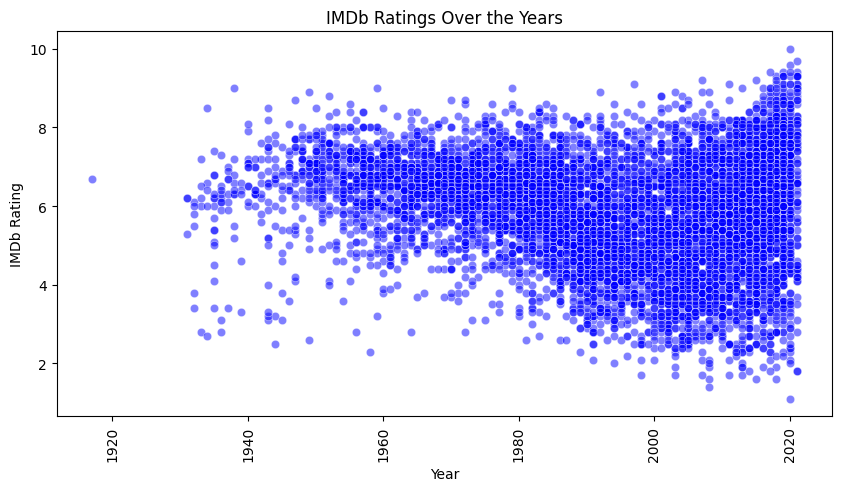

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Year'], y=df['Rating'], alpha=0.5, color='blue')
plt.xlabel("Year")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings Over the Years")
plt.xticks(rotation=90)
plt.show()

 Early Years (Before 1950s):

Fewer movies were produced, but most had higher ratings, suggesting that classic films were well-received.
##1970s - 1990s:

More movies appeared in the dataset, and the ratings were more spread out.This suggests a mix of both highly rated and lower-rated films, indicating experimentation in storytelling and commercial cinema.
##2000s - 2010s:

A higher concentration of movies is visible, showing a significant increase in production.
Ratings appear more varied, with some clustering in the mid-range (around 6.0 - 8.0), but outliers exist in both high and low ratings.
##2015 - Present:

A noticeable trend of movies with lower ratings (below 6.0) emerges.However, some movies still receive very high ratings, indicating a divide in audience preferences and movie quality.
##What This Means:
The golden era (1950s - 1970s) had fewer but highly rated movies.In recent years, while many movies are being made, quality varies significantly, possibly due to an increase in commercial and low-budget films.Some recent movies are still highly rated, showing that exceptional films continue to exist despite an overall decline in average ratings.

# 3: IMDb Rating vs Genre

<ipython-input-22-8771fe6752a8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_exploded['Genre'], y=df_exploded['Rating'], palette='coolwarm')


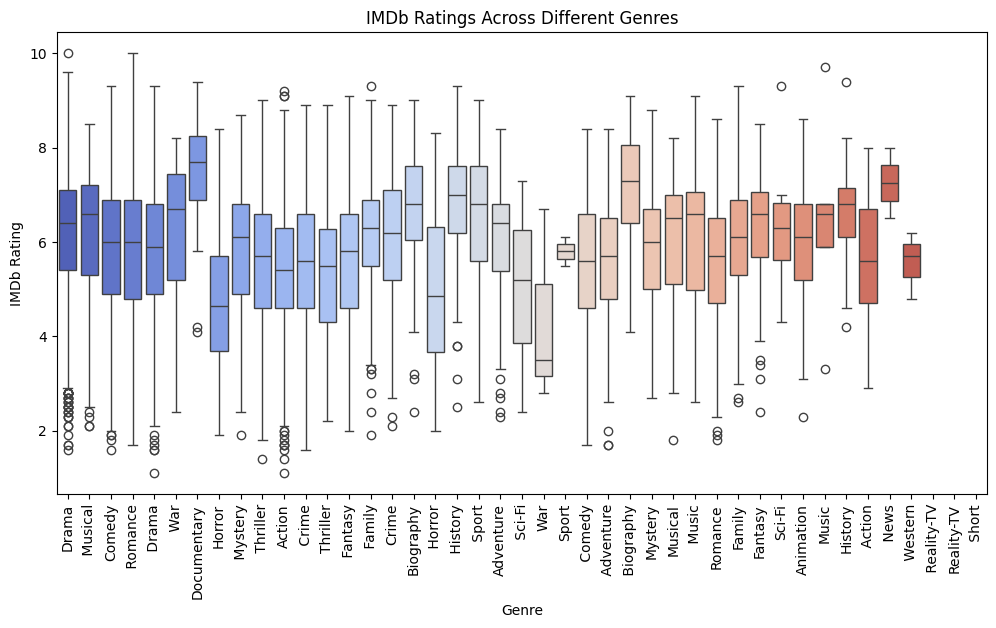

In [ ]:
plt.figure(figsize=(12, 6))
df_exploded = df.assign(Genre=df['Genre'].str.split(',')).explode('Genre')

df_exploded = df_exploded.reset_index(drop=True)
sns.boxplot(x=df_exploded['Genre'], y=df_exploded['Rating'], palette='coolwarm')
plt.xlabel("Genre")
plt.ylabel("IMDb Rating")
plt.title("IMDb Ratings Across Different Genres")
plt.xticks(rotation=90)
plt.show()

#Key take aways :
Biography movies get the most good rating consistantly in imbd minimum being about between 4.2 to 9

documentaries usually get rating above 6


only few sport movies are made rating from 4.6 to 6.1

drama and action has a lot of outliers

romance bot the topest imbd rating of 10 at maximum followed by drama and fantasy

audience tend to dislike war,western and horror







# 4: Most Popular Directors

<ipython-input-23-6a363c705465>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


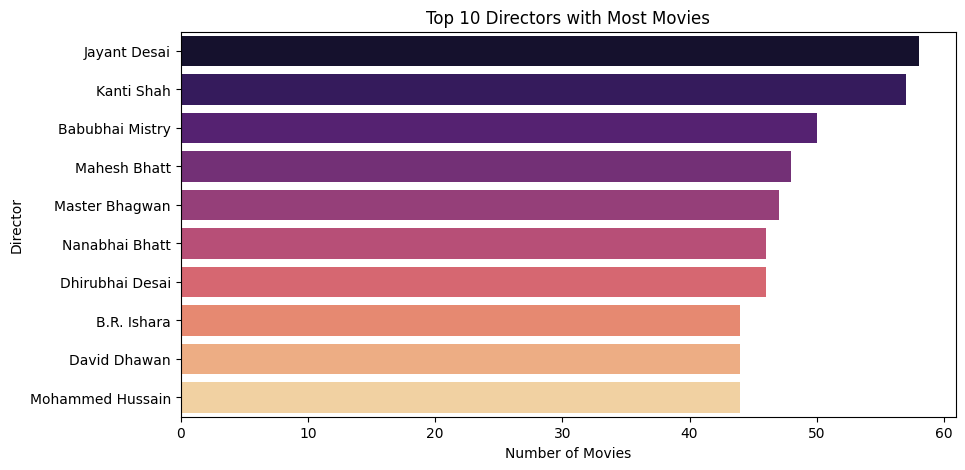

In [ ]:

top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.xlabel("Number of Movies")
plt.ylabel("Director")
plt.title("Top 10 Directors with Most Movies")
plt.show()

These individuals are primarily Indian film directors:

1. **Jayant Desai** - Director known for classic Hindi films.
2. **Kanti Shah** - Director famous for B-movies and cult classics.
3. **Babubhai Mistry** - Pioneer in Indian cinema, known for special effects and directing.
4. **Mahesh Bhatt** - Renowned director and producer in Bollywood.
5. **Master Bhagwan** - Actor-director in early Indian cinema.
6. **Nanabhai Bhatt** - Director and father of Mahesh Bhatt.
7. **Dhirubhai Desai** - Director in the Indian film industry.
8. **B.R. Ishara** - Director known for bold and unconventional films.
9. **David Dhawan** - Popular director of comedy and masala films.
10. **Mohammed Hussain** - Director associated with Hindi cinema.



# 5: Top 10 Movie Genres


<ipython-input-25-fbc98c82dc4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


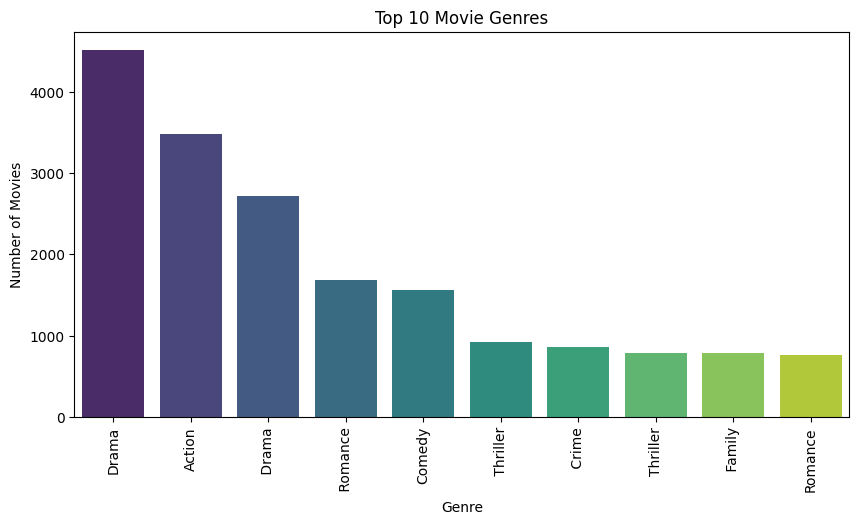

In [ ]:


genre_counts = df['Genre'].str.split(',').explode().value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top 10 Movie Genres")
plt.xticks(rotation=90)
plt.show()

audiences seem to want a balance of emotional depth, high-energy excitement, humor, suspense, and family-friendly content. There's a strong desire for stories that make them feel connected (drama, romance), keep them entertained (action, comedy), and create tension or intrigue (thriller, crime). The popularity of thrillers and drama also suggests an audience craving more complex, engaging narratives.**

In [ ]:
# Data preprocessing
df = df[['genre', 'director', 'actors', 'rating']]  # Select relevant columns
df.dropna(inplace=True)  # Drop missing values

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df['director'] = le.fit_transform(df['director'])
df['actors'] = le.fit_transform(df['actors'])

# Features and target
X = df.drop(columns=['rating'])
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature importance
feature_importances = pd.DataFrame({'Feature': ['genre', 'director', 'actors'], 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


KeyError: "None of [Index(['genre', 'director', 'actors', 'rating'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
csv_path = '/content/IMDb Movies India.csv'
df = pd.read_csv(csv_path, encoding='latin1')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))




# Data preprocessing
df = df[['genre', 'director', 'actors', 'rating']]  # Select relevant columns
df.dropna(inplace=True)  # Drop missing values

# Convert categorical variables to numeric using Label Encoding
le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])
df['director'] = le.fit_transform(df['director'])
df['actors'] = le.fit_transform(df['actors'])

# Features and target
X = df.drop(columns=['rating'])
y = df['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Feature importance
feature_importances = pd.DataFrame({'Feature': ['genre', 'director', 'actors'], 'Importance': model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

KeyError: "None of [Index(['genre', 'director', 'actors', 'rating'], dtype='object')] are in the [columns]"